# gráficas

## bibliotecas

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt
import skimage.io        as io

## primitivas gráficas

Podemos combinar en un gráfico imágenes, puntos, polilíneas, etc.

(600, 800, 3)
(-0.5, 799.5, 599.5, -0.5)


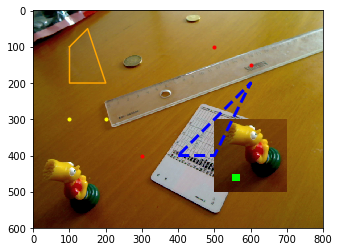

In [2]:
img = io.imread('../images/coins.png')

print(img.shape)

# extraigo un rectángulo del array de imagen
reg = img[400:,:200]

plt.imshow(img);
ax = plt.axis()
print(ax)

plt.plot([100,100,200,150,100]
        ,[100,200,200, 50,100],color='orange');

plt.plot([500,600,300]
        ,[100,150,400],'.r')

plt.plot([100,200],[300,300],'.',color='yellow');
plt.plot([400,500,600,400],[400,400,200,400],'-b',lw=3,ls='dashed');

reg[150:170,50:70,:] = np.array([0,255,0])


plt.imshow(reg, extent=[500,700,500,300])
#plt.axis([0,1000,0,1000]);
plt.axis(ax);

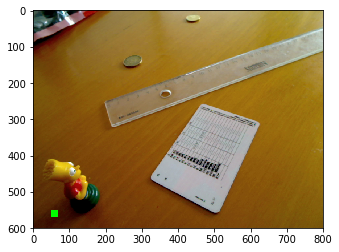

In [3]:
plt.imshow(img);

El trozo de imagen extraído es una referencia y sus modificaciones se producen realmente en la imagen original. Para evitarlo podemos hacer `reg = img[400:,:200].copy()`.

## guardar imágenes

Con `plt.savefig` podemos guardar la gráfica completa, y con `io.imsave` guardamos un array de imagen.

In [4]:
# plt.savefig('result.pdf')  # o .svg, .png, .jpg, etc.
# io.imsave('result.png', img)

## opencv

Matplotlib es apropiado para crear figuras de gran calidad en libros, artículos, etc. Pero para visualizar información en vivo es más eficiente usar las primitivas gráficas de opencv. Estas funciones modifican destructivamente un array de imagen, por lo que hay que manejarlas con cuidado.

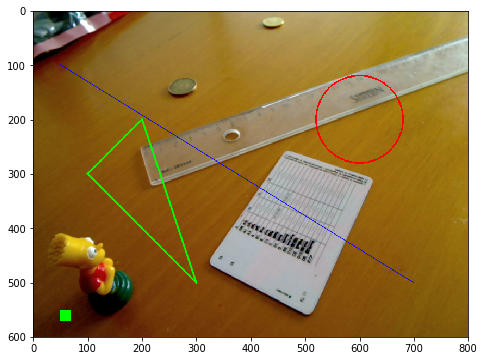

In [5]:
cv.circle(img,(600,200),80,(255,0,0),2)
cv.line(img,(50,100),(700,500),(0,0,255),1,cv.LINE_AA)

poly = np.array([[100,300],
                 [200,200],
                 [300,500]])
cv.polylines(img, [ poly ], isClosed= True, color=(0,255,0), thickness= 2, lineType=cv.LINE_AA )

plt.figure(figsize=(8,6))
plt.imshow(img);

Es importante recordar que opencv lee y escribe imágenes en orden BGR, mientras que matplotlib y skimage usan RGB.

## conversión a monocromo y colormap

In [6]:
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
g.shape

(600, 800)

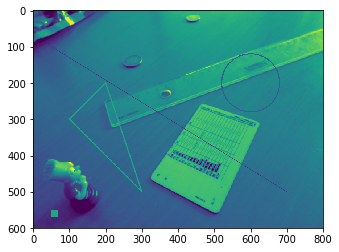

In [7]:
plt.imshow(g);

Las imágenes monocromas (un solo canal), se muestran con un mapa de color que por omisión no es muy bonito. Podemos cambiarlo.

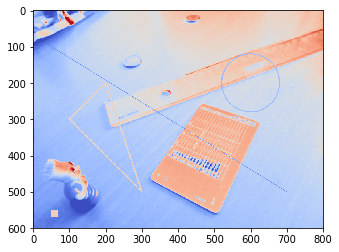

In [8]:
plt.imshow(g,'coolwarm');

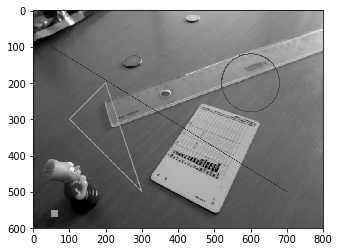

In [9]:
plt.imshow(g,'gray');

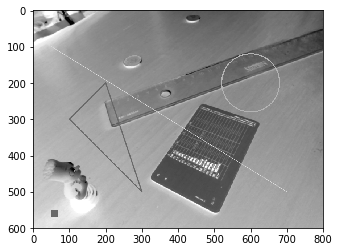

In [10]:
plt.imshow(255-g,'gray');

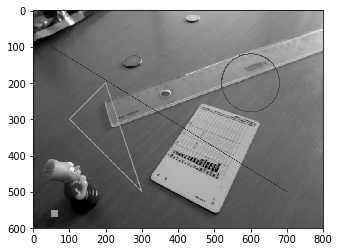

In [11]:
plt.set_cmap('gray'); # fijamos el colormap

plt.imshow(g);

## imagen como superficie

In [12]:
np.meshgrid(np.arange(5),np.arange(4))

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]])]

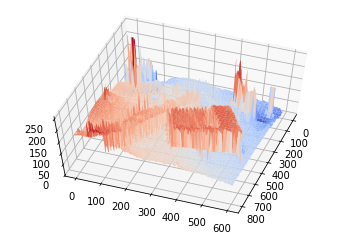

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r,c = g.shape
x,y = np.meshgrid(np.arange(c), np.arange(r))

# la coordenada z del gráfico 3D es el nivel de gris de la imagen anterior.
z = g

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0);
ax.view_init(60, 20)

Con el mapa de color `cmap='gray'` y mirando desde arriba se ve la imagen original. 

Rearrancando con `%matplotlib notebook` las gráficas se pueden modificar interactivamente, aunque no va muy ágil.

## opengl

Para crear efectos 3D lo ideal es utilizar bibliotecas gráficas optimizadas.

El ejemplo de código [`surface.py`](../code/surface.py) muestra en vivo la superficie de niveles de gris anterior con la secuencia de imágenes de la webcam.  En la ventana gráfica podemos hacer zoom y cambiar el punto de vista.